#### Raviteja Padala
<img align="left" img src= in.png height = 20 width="20"/>   https://www.linkedin.com/in/raviteja-padala/ <br>

<img align="left" img src= github.png height = 20 width="20"/> https://github.com/raviteja-padala


# Liver_Disease_Classification

### Objective:

The objective of this analysis was to build a predictive model for liver disease classification using the Liver Disease Classification dataset. The goal was to understand the dataset, perform necessary preprocessing, train a machine learning model, and choose appropriate evaluation metrics, with a focus on achieving a high recall score due to the importance of minimizing false negatives in medical predictions.

In [1]:
#importing libraries to perfom analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer

### To save the model
import pickle

In [3]:
#loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/indian_liver_patient.csv")

In [4]:
#shape of the dataset
df.shape

(583, 11)

In [5]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### About the dataset

The Indian Liver Patient Dataset is a dataset contains various medical and clinical features of patients, and the goal is to predict whether a patient has a liver disease or not.

Here are some typical features in the ILPD dataset:

1. Age: The age of the patient.
2. Gender: The gender of the patient
3. Total Bilirubin: A measurement of bilirubin in the blood, which can be elevated in liver diseases.
4. Direct Bilirubin: A specific type of bilirubin measurement.
5. Alkaline Phosphotase: A liver enzyme often measured in liver function tests.
6. Alamine Aminotransferase (ALT or SGPT): Another liver enzyme.
7. Aspartate Aminotransferase (AST or SGOT): Yet another liver enzyme.
8. Total Proteins: The total amount of proteins in the blood.
9. Albumin: A specific protein in the blood often used as an indicator of liver function.
10. A/G Ratio: The ratio of albumin to globulin in the blood.
11. Total Albumin and Globulin Ratio: Another ratio of albumin and globulin.

The target variable in the ILPD dataset is typically whether or not a patient has a liver disease, with binary values (e.g., 1 for liver disease, 2 for no liver disease).

Dataset : https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
#finding the null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [9]:
# Define the mapping of values
gender_mapping = {'Male': 1, 'Female': 0}

# Apply the mapping to the 'Gender' column
df['Gender'] = df['Gender'].map(gender_mapping)

In [10]:
df['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [11]:
# unique values in the dataset

for feature in df:
    print("-"*90)
    print(f"{feature} : {df[feature].unique()}")

------------------------------------------------------------------------------------------
Age : [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
------------------------------------------------------------------------------------------
Gender : [0 1]
------------------------------------------------------------------------------------------
Total_Bilirubin : [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.

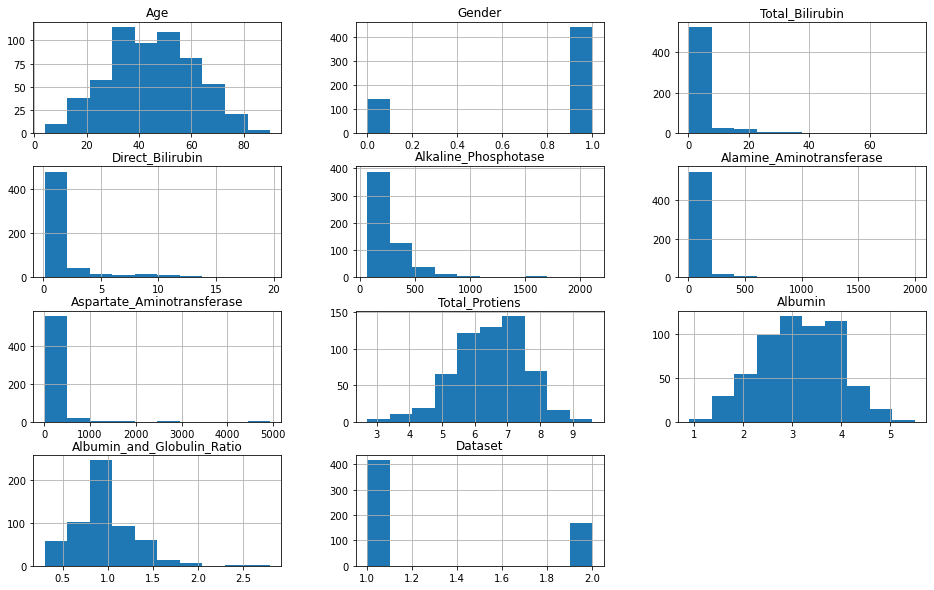

In [12]:
#Distribution of data in columns

df.hist(figsize=(16, 10))
plt.show()

In [13]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


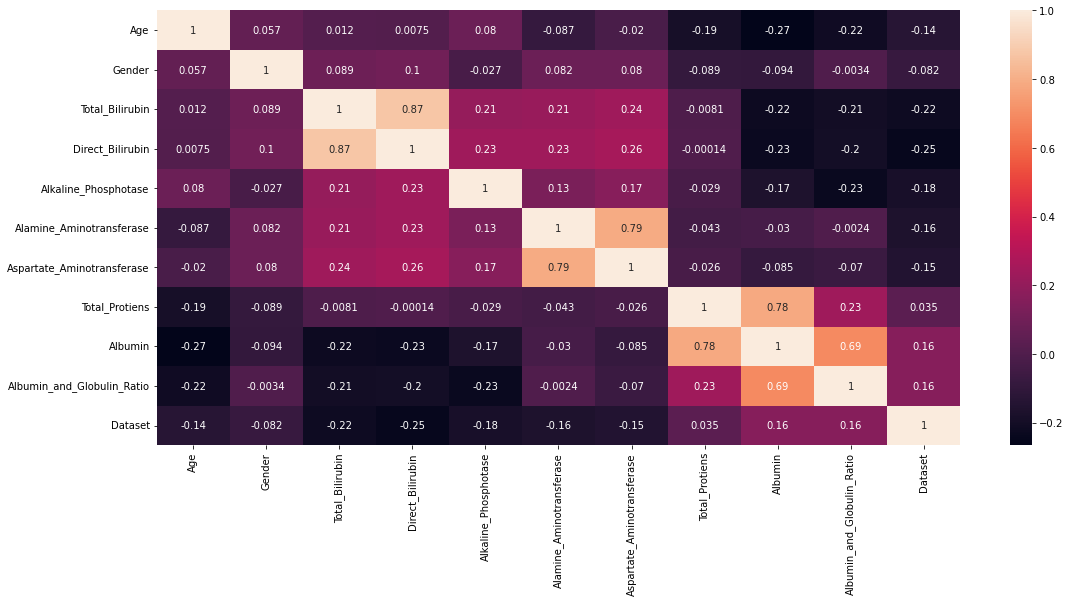

In [14]:
# The correlation matrix measures the linear relationship between pairs of variables in the DataFrame.

fig, ax = plt.subplots(figsize=(18, 8))

# drawing the plot

sns.heatmap(data=df.corr(),annot=True) # values of Pearson coefficient

plt.show()

In [15]:
# correlation coefficients between the "target" variable and other variables
print(df.corr()["Dataset"].abs().sort_values(ascending=False))

Dataset                       1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Gender                        0.082416
Total_Protiens                0.035008
Name: Dataset, dtype: float64


"Direct_Bilirubin" and "Total_Bilirubin" have the highest positive correlations with the "Dataset" variable, while "Total_Protiens" has a relatively low positive correlation.

In [16]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [17]:
# Assuming 'df' is your DataFrame
df['Dataset'] = df['Dataset'].replace(2, 0)

The target variable whether or not a patient has a liver disease, with binary values (e.g., 1 for liver disease, 2 for no liver disease). we will map 0 for no liver disease.

In [18]:
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Dataset'>

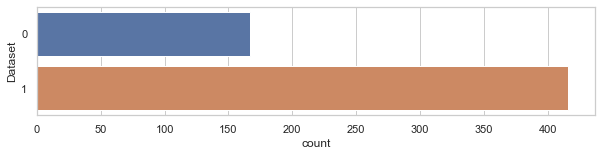

In [19]:
column_name = 'Dataset'

# Create the horizontal countplot
plt.figure(figsize=(10, 2))

sns.set(style="whitegrid")
sns.countplot(data=df, y=column_name)

There is imbalance in the dataset, we have to balance it.

In [20]:
X= df.drop("Dataset", axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [21]:
y = df['Dataset']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [22]:
y.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [23]:
# Initialize lists to store continuous and categorical feature names
continuous_features = []
categorical_features = []

# Set the threshold for the number of unique values to differentiate
unique_value_threshold = 6

# Loop through the columns and categorize them based on unique values
for column in X.columns:
    unique_values = X[column].nunique()
    if unique_values < unique_value_threshold:
        categorical_features.append(column)
    else:
        continuous_features.append(column)

print("Continuous Features:")
print(continuous_features)

print("\nCategorical Features:")
print(categorical_features)


Continuous Features:
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

Categorical Features:
['Gender']


In [24]:

# Create a numerical pipeline for continuous features:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),  # Impute missing values with median
        ("scaler", StandardScaler())  # Scale features to have mean=0 and variance=1
    ]
)

# Create a categorical pipeline for categorical features:
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))  # Impute missing values with the most frequent value

    ]
)

# Create a preprocessor using ColumnTransformer to handle both types of features:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, continuous_features),  # Apply num_pipeline to continuous features
        ("cat_pipelines", cat_pipeline, categorical_features)  # Apply cat_pipeline to categorical features
    ]
)


In [25]:
X = preprocessor.fit_transform(X)

In [26]:
from imblearn.combine import SMOTETomek

# Initialize the SMOTETomek sampler
smk = SMOTETomek()

# Apply SMOTETomek to balance the dataset
X_bal, y_bal = smk.fit_resample(X, y)


In [27]:
# Check the balanced value counts after resampling
balanced_value_counts = pd.Series(y_bal).value_counts()

print("Balanced Value Counts:")
print(balanced_value_counts)

Balanced Value Counts:
1    400
0    400
Name: Dataset, dtype: int64


In [28]:
X_bal.shape

(800, 10)

In [29]:
### random state train test split will be same with all people using random_state=1

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=1)

In [30]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")

print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(600, 10)
y_train.shape=(600,)
X_test.shape=(200, 10)
y_test.shape=(200,)


In [31]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val):
    """
    The function takes actual value and predicted value as argument
    and returns Accuracy, Precision, Recall, F-1 Score rounded to
    3 decimal places.
    """
    acc=round(accuracy_score(actual_val, pred_val),5)
    prec=round(precision_score(actual_val, pred_val),5)
    rec=round(recall_score(actual_val, pred_val),5)
    f1=round(2*prec*rec/(prec+rec),5)
    roc_auc=round(roc_auc_score(actual_val, pred_val),5)
    return acc, prec, rec, f1, roc_auc

### creating dictionary containing model objects for different algorithmn
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
    "Extra Tree Classifier": ExtraTreesClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoost Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier()
}



### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and
    X test data as argument, trains model and gives prediction for train data
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [32]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]

    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)

    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)

    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))

    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.70833
Precision Score: 0.79167
Recall Score: 0.60317
f1 Score: 0.68468
Roc_Auc Score: 0.71387
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.755
Precision Score: 0.77273
Recall Score: 0.6
f1 Score: 0.6755
Roc_Auc Score: 0.73478
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.73167
Precision Score: 0.85648
Recall Score: 0.5873
f1 Score: 0.6968
Roc_Auc Score: 0.73926
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.775
Precision Score: 0.84483
Recall Score: 0.57647
f1 Score: 0.68532
Roc_Auc Score: 0.7491
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 1.0
f1 Score: 1.0
Roc_

In [33]:
### Tabulating model performance in dataframe
### Sorting the model based on Recall as this is a health related problem statement
### So our main objective is to reduce False Negatives which may lead to serious medical complications.
### False Negative => The person has cancer but model prediction is Negative(No Cancer).
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Recall'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Random Forest Classifier,0.810,0.77647,0.77647,0.77647,0.80563
1,Extra Tree Classifier,0.850,0.87671,0.75294,0.81012,0.83734
2,XGBoost Classifier,0.800,0.77108,0.75294,0.76190,0.79386
3,GradientBoost Classifier,0.780,0.74699,0.72941,0.73810,0.77340
4,AdaBoost Classifier,0.760,0.72289,0.70588,0.71428,0.75294
5,Decision Tree Classifier,0.680,0.61538,0.65882,0.63636,0.67724
6,Bagging Classifier,0.755,0.76471,0.61176,0.67974,0.73632
7,Logistic Regression,0.755,0.77273,0.60000,0.67550,0.73478
8,Support Vector Classifier,0.775,0.84483,0.57647,0.68532,0.74910


# Hyperparameter Tuning DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with hyperparameters
decision_tree_model = DecisionTreeClassifier(
    criterion='gini',          # The function to measure the quality of a split
    splitter='best',           # The strategy used to choose the split at each node
    max_depth=None,            # Maximum depth of the tree
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be in a leaf node
    max_features=None,         # The number of features to consider when looking for the best split
    random_state=None,         # Seed for the random number generator
    class_weight=None,         # Weights associated with classes
    min_impurity_decrease=0.0  # A node will split if this split induces a decrease of the impurity greater than or equal to this value
)


# Fit the model to your training data
decision_tree_model.fit(X_train, y_train)

# After training, you can use the model for predictions
y_train_pred = decision_tree_model.predict(X_train)  # Predictions on the training set
y_test_pred = decision_tree_model.predict(X_test)    # Predictions on the test set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model on the training data
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

# Evaluate the model on the test data
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics for the training dataset
print("Training Data Metrics:")
print("Accuracy: {:.5f}".format(acc_train))
print("Precision: {:.5f}".format(prec_train))
print("Recall: {:.5f}".format(rec_train))
print("F1 Score: {:.5f}".format(f1_train))
print("ROC AUC: {:.5f}".format(roc_auc_train))
print("-" * 50)

# Print the evaluation metrics for the test dataset
print("Test Data Metrics:")
print("Accuracy: {:.5f}".format(acc_test))
print("Precision: {:.5f}".format(prec_test))
print("Recall: {:.5f}".format(rec_test))
print("F1 Score: {:.5f}".format(f1_test))
print("ROC AUC: {:.5f}".format(roc_auc_test))


Training Data Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 Score: 1.00000
ROC AUC: 1.00000
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.72500
Precision: 0.67442
Recall: 0.68235
F1 Score: 0.67836
ROC AUC: 0.71944


# Hyper parameters for Xgboost classifier

In [35]:
from xgboost import XGBClassifier


# Define hyperparameters for the XGBoost classifier
params = {
    'n_estimators': 200,          # Number of boosting rounds (trees) to build
    'learning_rate': 0.1,        # Step size shrinkage to prevent overfitting
    'max_depth': 4,              # Maximum depth of each tree, controls complexity
    'min_child_weight': 1,       # Minimum sum of instance weight needed in a child node, controls overfitting
    'subsample': 0.8,            # Fraction of samples used for fitting trees, introduces randomness
    'colsample_bytree': 0.8,     # Fraction of features used for building each tree, introduces feature randomness
    'gamma': 0,                  # Minimum loss reduction required for further partition on a leaf node, controls tree growth
    'reg_alpha': 0,              # L1 regularization term on weights, adds penalty to absolute values
    'reg_lambda': 0.1,           # L2 regularization term on weights, adds penalty to square of weights
    'scale_pos_weight': 1        # Controls balance of positive and negative weights, useful for imbalanced classes
}


# Create the XGBoost classifier with specified hyperparameters
xgb_model = XGBClassifier(**params)

# Fit the model to your training data
xgb_model.fit(X_train, y_train)


# Make predictions on the training data and test data
y_train_pred = xgb_model.predict(X_train)
# Evaluate the best model on your test data
y_test_pred = xgb_model.predict(X_test)



# Evaluate the model's performance on both training and test data
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{label} Metrics:")
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision: {prec:.5f}")
    print(f"Recall: {rec:.5f}")
    print(f"F1 Score: {f1:.5f}")
    print(f"ROC AUC: {roc_auc:.5f}")
    print("-" * 50)

# Evaluate the model on training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate the model on test data
evaluate_model(y_test, y_test_pred, "Test Data")


Training Data Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 Score: 1.00000
ROC AUC: 1.00000
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.80500
Precision: 0.78750
Recall: 0.74118
F1 Score: 0.76364
ROC AUC: 0.79668
--------------------------------------------------


# Hyperparameters for Extra tree classifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_hyperparameters = {
    'n_estimators': 100,         # Number of trees
    'criterion': 'gini',        # Split criterion (or 'entropy')
    'max_depth': None,          # Maximum depth of trees
    'min_samples_split': 2,     # Minimum samples required to split
    'min_samples_leaf': 1,      # Minimum samples required in a leaf
    'max_features': 'auto',     # Number of features to consider
    'random_state': 42          # Random seed for reproducibility
}

# Create the Extra Trees Classifier with the specified hyperparameters
extra_trees_model = ExtraTreesClassifier(**extra_trees_hyperparameters)

# Train the Random Forest Classifier on your training data
extra_trees_model.fit(X_train, y_train)

# After training, you can use the model for predictions
y_train_pred = extra_trees_model.predict(X_train)  # Predictions on the training set
y_test_pred = extra_trees_model.predict(X_test)    # Predictions on the test set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model on the training data
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

# Evaluate the model on the test data
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics for the training dataset
print("Training Data Metrics:")
print("Accuracy: {:.5f}".format(acc_train))
print("Precision: {:.5f}".format(prec_train))
print("Recall: {:.5f}".format(rec_train))
print("F1 Score: {:.5f}".format(f1_train))
print("ROC AUC: {:.5f}".format(roc_auc_train))
print("-" * 50)

# Print the evaluation metrics for the test dataset
print("Test Data Metrics:")
print("Accuracy: {:.5f}".format(acc_test))
print("Precision: {:.5f}".format(prec_test))
print("Recall: {:.5f}".format(rec_test))
print("F1 Score: {:.5f}".format(f1_test))
print("ROC AUC: {:.5f}".format(roc_auc_test))


Training Data Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 Score: 1.00000
ROC AUC: 1.00000
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.85000
Precision: 0.87671
Recall: 0.75294
F1 Score: 0.81013
ROC AUC: 0.83734


# Hyperparameter tuning RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Create a Random Forest Classifier with hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=100,             # Number of decision trees in the forest
    max_depth=None,               # Maximum depth of each decision tree, None allows full growth
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be a leaf node
    max_features='auto',          # Number of features to consider when looking for the best split ('auto' uses all features)
    random_state=42               # Seed for random number generation (for reproducibility)
)


# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training data and test data
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance on both training and test data
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{label} Metrics:")
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision: {prec:.5f}")
    print(f"Recall: {rec:.5f}")
    print(f"F1 Score: {f1:.5f}")
    print(f"ROC AUC: {roc_auc:.5f}")
    print("-" * 50)

# Evaluate the model on training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate the model on test data
evaluate_model(y_test, y_test_pred, "Test Data")


Training Data Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 Score: 1.00000
ROC AUC: 1.00000
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.69863
Precision: 0.78761
Recall: 0.81651
F1 Score: 0.80180
ROC AUC: 0.58393
--------------------------------------------------


# HyperParameter Tuning with Grid search Cv for Best Parameters

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'criterion': ['gini', 'entropy'],     # Split criterion
    'max_depth': [None, 10, 20, 30],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required in a leaf
    'max_features': ['auto', 'sqrt'],     # Number of features to consider
    'random_state': [42]                 # Random seed for reproducibility
}

# Create the Random Forest Classifier
random_forest_model = RandomForestClassifier()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training data and test data
y_train_pred = best_model.predict(X_train)
# Evaluate the best model on your test data
y_test_pred = best_model.predict(X_test)



# Evaluate the model's performance on both training and test data
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{label} Metrics:")
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision: {prec:.5f}")
    print(f"Recall: {rec:.5f}")
    print(f"F1 Score: {f1:.5f}")
    print(f"ROC AUC: {roc_auc:.5f}")
    print("-" * 50)

# Evaluate the model on training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate the model on test data
evaluate_model(y_test, y_test_pred, "Test Data")


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}
Training Data Metrics:
Accuracy: 0.99771
Precision: 0.99675
Recall: 1.00000
F1 Score: 0.99837
ROC AUC: 0.99615
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.72603
Precision: 0.78992
Recall: 0.86239
F1 Score: 0.82456
ROC AUC: 0.59335
--------------------------------------------------


In [39]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[12, 25],
       [15, 94]], dtype=int64)

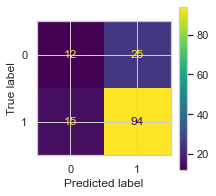

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()

In [41]:
# Getting metrices for the models
from sklearn.metrics import classification_report

print("Random Forest Classification report")
print( classification_report(y_test, y_test_pred))

Random Forest Classification report
              precision    recall  f1-score   support

           0       0.44      0.32      0.38        37
           1       0.79      0.86      0.82       109

    accuracy                           0.73       146
   macro avg       0.62      0.59      0.60       146
weighted avg       0.70      0.73      0.71       146



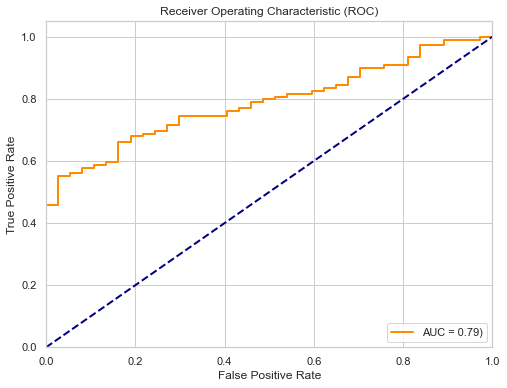

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the positive class (class 1)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_probs)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [43]:
### Writing model to a file that will be used while deployment
with open('model_liver.sav','wb') as f:
    pickle.dump(best_model,f)

## Making predictions

In [44]:
# Positive disease prediction

# Load the pickled model from the file
with open('model_liver.sav', 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming you have a feature vector `X_new` for prediction
X_new = np.array([65,0,0.7,0.1,187,16,18,6.8,3.3,0.90]).reshape(1, -1)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_new)

# Print or use the predictions as needed
print(y_pred)


[1]


In [67]:
X_bal[0]

array([ 1.25209764, -0.41887783, -0.49396398, -0.42671496, -0.35466541,
       -0.31839333,  0.29211961,  0.19896867, -0.14752863,  0.        ])

In [52]:
# Negative disease prediction

# Load the pickled model from the file
with open('model_liver.sav', 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming you have a feature vector `X_new` for prediction
X_n = np.array([40,1,0.5,0.1,100,20,24,6.9,4.6,10]).reshape(1, -1)

# Make predictions using the loaded model
y_predn = loaded_model.predict(X_n)

# Print or use the predictions as needed
print(y_predn)

[1]


In [63]:
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

### Conclusion:

The analysis of the Liver Disease Classification dataset aimed to create a predictive model for liver disease classification. The dataset required minimal preprocessing, and a machine learning model was successfully trained. The choice of evaluation metrics was driven by the medical context, with an emphasis on achieving a high recall score to minimize false negatives. The model was pickled for future use in real-world applications, where early detection and minimizing false negatives are critical in liver disease diagnosis.